In [1]:
#Going to implement logistic regression using a small dataset
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split

In [29]:
import random

synthetic_data = {
    "age": [],
    "salary": [],
    "purchased": []
}

random.seed(42)
for _ in range(1000):
    age = random.randint(20, 60)
    salary = random.randint(30000, 120000)

    # probability of purchase increases with age & salary
    prob = (age / 60) * 0.4 + (salary / 120000) * 0.6
    purchased = 1 if random.random() < prob else 0

    synthetic_data["age"].append(age)
    synthetic_data["salary"].append(salary)
    synthetic_data["purchased"].append(purchased)

# synthetic_data


In [30]:
df = pd.DataFrame(synthetic_data)
df.to_csv(".\\dataset\\employee_purchase_data.csv", index=False)
df.head(100)

,age,salary,purchased
0,60,44592,1
1,37,62098,1
2,26,118696,1
3,54,41395,0
4,22,33905,1
...,...,...,...
95,56,62271,1
96,22,111183,1
97,57,104085,1
98,36,56772,0


In [31]:
# perform scaling on age and salary feature using min-max scaling
df['age_scaled'] = (df['age'] - df['age'].min()) / (df['age'].max() - df['age'].min())
df['salary_scaled'] = (df['salary'] - df['salary'].min()) / (df['salary'].max() - df['salary'].min())

In [32]:
df.head()

,age,salary,purchased,age_scaled,salary_scaled
0,60,44592,1,1.000,0.161491
1,37,62098,1,0.425,0.356218
2,26,118696,1,0.150,0.985784
3,54,41395,0,0.850,0.125929
4,22,33905,1,0.050,0.042614


In [33]:
#split data into features and target    
X = df[['age_scaled', 'salary_scaled']].values
y = df['purchased'].values  

In [34]:
#step 1: define hypothes and sigmoid function   
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
#step 2: define binay cross-entrop loss function
def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-15  # to avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # clip predictions
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


In [35]:
#step 3: perform training for one epoch 
#initialize w1, w2 and b with 0;
w1 = 0.57
w2 = 0.43    
b = 0.5
#initialize weights and bias
print("Initial weights and bias:")
print(f"w1: {w1}, w2: {w2}, b: {b}")
#learning rate
learning_rate = 0.01
#number of epochs 
epochs = 10

Initial weights and bias:
w1: 0.57, w2: 0.43, b: 0.5


In [36]:
#train the model
for epoch in range(epochs):
    # calculate linear combination
    z = np.dot(X, np.array([w1, w2])) + b
    # print("z:", z)
    # apply sigmoid function
    y_pred = sigmoid(z)
    # print("y_pred:", y_pred)
    # print("Error:", y_pred - y)
    # calculate loss
    loss = binary_cross_entropy(y, y_pred)
    
    # calculate gradients
    dw1 = np.dot(X[:, 0], (y_pred - y)) / len(y)
    dw2 = np.dot(X[:, 1], (y_pred - y)) / len(y)
    db = np.sum(y_pred - y) / len(y)
    
    # update weights and bias
    w1 = w1- learning_rate * dw1
    w2 = w2-learning_rate * dw2
    b = b- learning_rate * db
    # print the value of weights and bias
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}, \n w1: {w1:.4f}, w2: {w2:.4f}, b: {b:.4f}")



Epoch 1/10, Loss: 0.6259, 
 w1: 0.5697, w2: 0.4300, b: 0.4993
Epoch 2/10, Loss: 0.6258, 
 w1: 0.5695, w2: 0.4299, b: 0.4987
Epoch 3/10, Loss: 0.6258, 
 w1: 0.5692, w2: 0.4299, b: 0.4980
Epoch 4/10, Loss: 0.6257, 
 w1: 0.5690, w2: 0.4298, b: 0.4974
Epoch 5/10, Loss: 0.6257, 
 w1: 0.5687, w2: 0.4298, b: 0.4967
Epoch 6/10, Loss: 0.6256, 
 w1: 0.5684, w2: 0.4298, b: 0.4961
Epoch 7/10, Loss: 0.6256, 
 w1: 0.5682, w2: 0.4297, b: 0.4954
Epoch 8/10, Loss: 0.6255, 
 w1: 0.5679, w2: 0.4297, b: 0.4948
Epoch 9/10, Loss: 0.6255, 
 w1: 0.5677, w2: 0.4297, b: 0.4942
Epoch 10/10, Loss: 0.6254, 
 w1: 0.5674, w2: 0.4296, b: 0.4935


In [37]:
#step 4: make predictions
# calculate linear combination
z = np.dot(X, np.array([w1, w2])) + b
# apply sigmoid function    
y_pred = sigmoid(z)
# print("predicted probabilities:", y_pred)
# convert probabilities to binary predictions
y_pred_binary = (y_pred >= 0.5).astype(int) 
# print class
# print("Predicted class:", y_pred_binary)   

In [48]:
# Evaluate the model 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, y_pred_binary)
print("Accuracy:", accuracy)



Accuracy: 0.667


# implement logistic regression using sklearn library

In [39]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


model = LogisticRegression(max_iter=10)
model.fit(X, y)



c:\Users\hp\anaconda3\envs\aiml\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 10 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10
,multi_class,'deprecated'


In [40]:
model.coef_


array([[0.90068659, 2.0649358 ]])

In [41]:
model.intercept_

array([-0.74532005])

In [45]:
y_pred = model.predict(X)
# print("y_pred:", y_pred)
print("Accuracy:", accuracy_score(y, y_pred))
print(classification_report(y, y_pred))


Accuracy: 0.678
              precision    recall  f1-score   support

           0       0.54      0.20      0.30       333
           1       0.70      0.91      0.79       667

    accuracy                           0.68      1000
   macro avg       0.62      0.56      0.54      1000
weighted avg       0.65      0.68      0.63      1000



In [43]:
from sklearn.metrics import ConfusionMatrixDisplay

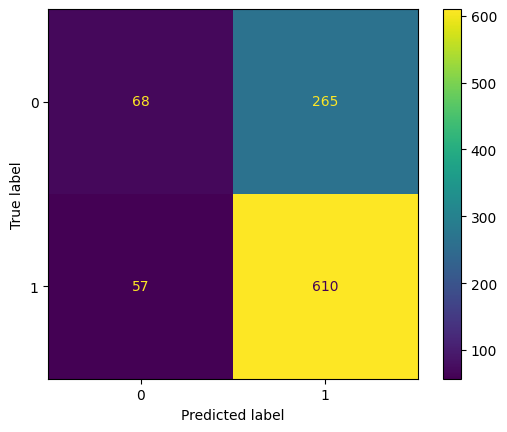

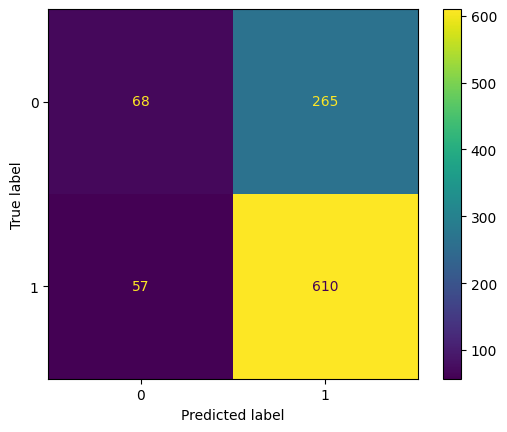

In [44]:
cm_display = ConfusionMatrixDisplay.from_predictions(y, y_pred)
cm_display.plot()